[*********************100%***********************]  1 of 1 completed


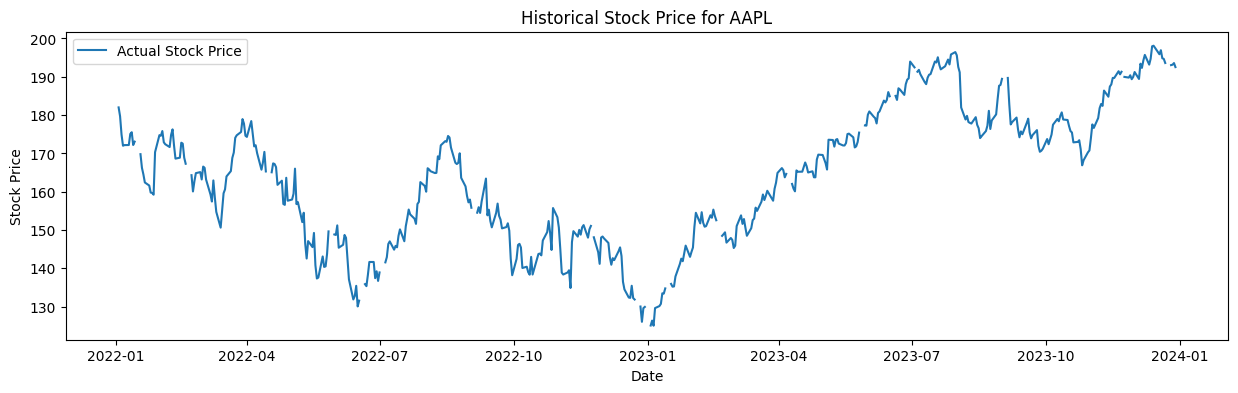

In [33]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np 

# Define the stock symbol and time interval
symbol = 'AAPL'

# Fetch historical stock data from Yahoo Finance
data = yf.download(symbol, start='2022-01-01', end='2024-01-01')
data = data.asfreq('B') 

# Use the 'Close' prices for simplicity
data = data['Close']


# Plot the stock data
plt.figure(figsize=(15, 4))
plt.plot(data, label='Actual Stock Price')
plt.title(f'Historical Stock Price for {symbol}')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


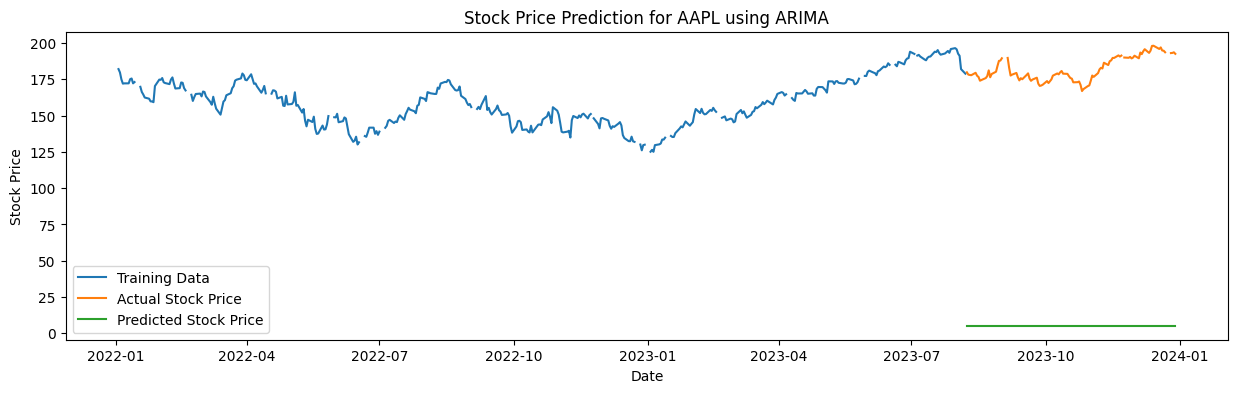

In [34]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Train the ARIMA model
train_data_transformed = np.log1p(train_data)
model = ARIMA(train_data_transformed, order=(0, 1, 0))  # You can adjust the order parameter
result = model.fit()

# Make predictions on the test set
predictions = result.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

# Plot the predictions against the actual values
plt.figure(figsize=(15,4))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Actual Stock Price')
plt.plot(test_data.index, predictions, label='Predicted Stock Price')
plt.title(f'Stock Price Prediction for {symbol} using ARIMA')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

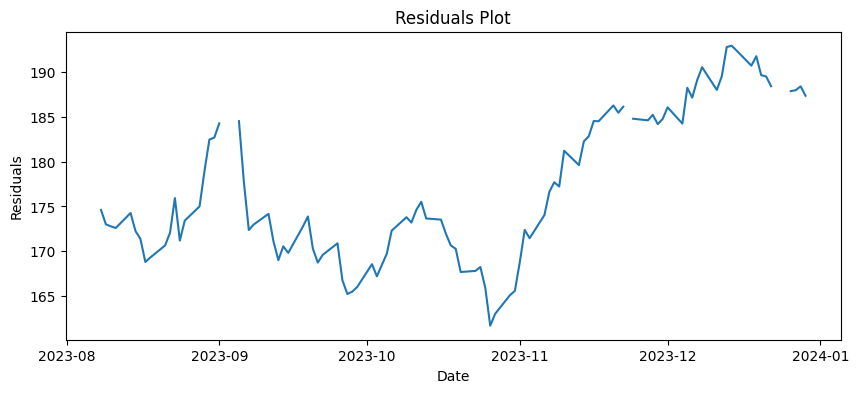

In [35]:
# Plot residuals
residuals = test_data - predictions
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()


In [36]:
import itertools

# Grid search for best parameters
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

best_aic = float("inf")
best_order = (0, 0, 0)

for p, d, q in itertools.product(p_values, d_values, q_values):
    model = ARIMA(train_data, order=(p, d, q))
    try:
        result = model.fit()
        aic = result.aic
        if aic < best_aic:
            best_aic = aic
            best_order = (p, d, q)
    except:
        continue

print("Best AIC:", best_aic)
print("Best Order:", best_order)

c:\Users\sengu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\sengu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\sengu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\sengu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\sengu\anaconda3\lib\site-packages\stat

Best AIC: 2019.7292139013346
Best Order: (0, 1, 0)


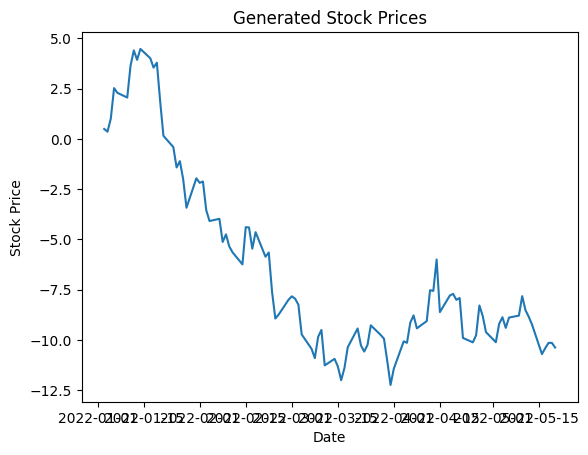

c:\Users\sengu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\sengu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\sengu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


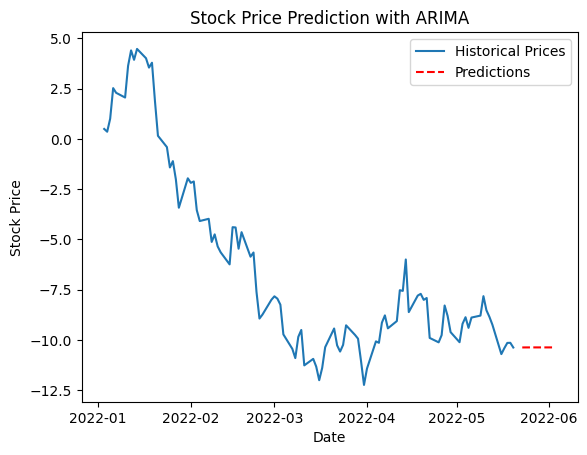

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Generate a simple dataset
np.random.seed(42)
date_range = pd.date_range(start='2022-01-01', periods=100, freq='B')
data = {'Date': date_range, 'Price': np.cumsum(np.random.normal(size=100))}
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Plot the data
plt.plot(df['Price'])
plt.title('Generated Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

# Train the ARIMA model
model = ARIMA(df['Price'], order=(1, 1, 1))  # Order parameters can be adjusted
result = model.fit()

# Generate predictions for the future time points
future_steps = 10
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(days=1), periods=future_steps, freq='B')
predictions = result.predict(start=len(df), end=len(df) + future_steps - 1, typ='levels')

# Plot the results
plt.plot(df['Price'], label='Historical Prices')
plt.plot(future_dates, predictions, label='Predictions', linestyle='dashed', color='red')
plt.title('Stock Price Prediction with ARIMA')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
